In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


life_expectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [3]:
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
life_expectancy_df= life_expectancy_df.rename(columns={"Life expectancy ": "Life expectancy", "Measles ": "Measles",
                                                       " BMI ": "BMI", "Diphtheria ": "Diphtheria", " thinness 5-9 years": "thinness 5-9 years",
                                                       " thinness 5-9 years":"thinness 5-9 years"})
                                                       

In [5]:
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Deleted all the blank spaces in the columns

In [6]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

Only two categirical variables. They are country and Status. The rest are continous variables. 

In [8]:
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
life_expectancy_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

In [10]:
life_expectancy_df.isnull().sum()*100/life_expectancy_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

This is the percentage of nulls in each columns. 

In [42]:
life_expectancy_df["Life expectancy"].fillna(life_expectancy_df["Life expectancy"].mean(), inplace=True)
life_expectancy_df["Adult Mortality"].fillna(life_expectancy_df["Adult Mortality"].mean(), inplace=True)
life_expectancy_df["Population"].fillna(life_expectancy_df["Population"].mean(), inplace=True)
life_expectancy_df["BMI"].fillna(life_expectancy_df["BMI"].mean(), inplace=True)
life_expectancy_df["GDP"].fillna(life_expectancy_df["GDP"].mean(), inplace=True)
life_expectancy_df["Alcohol"].fillna(life_expectancy_df["Alcohol"].mean(), inplace=True)

# Used mean for the imputation to filled in the missing values for the chosen variables.

In [43]:
life_expectancy_df.isnull().sum()*100/life_expectancy_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 0.000000
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                 0.000000
Population                          0.000000
 thinness  1-19 years               1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

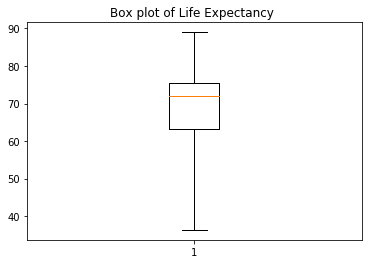

In [34]:
plt.boxplot(life_expectancy_df["Life expectancy"], whis= 200)
plt.title("Box plot of Life Expectancy ")
plt.show()
#Shows no major outliers

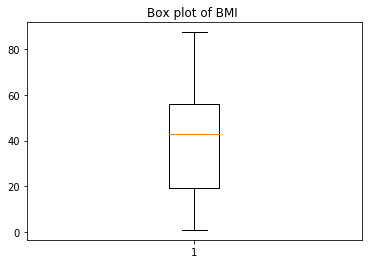

In [37]:
plt.boxplot(life_expectancy_df["BMI"], whis= 200)
plt.title("Box plot of BMI ")
plt.show()
#Shows no major outliers

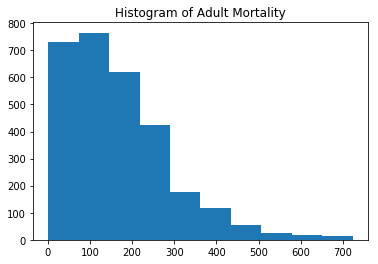

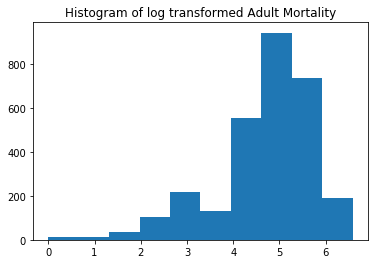

In [74]:
plt.hist(life_expectancy_df["Adult Mortality"])
plt.title("Histogram of Adult Mortality")
plt.show()
#Shows  major outliers


plt.hist(np.log(life_expectancy_df["Adult Mortality"]))
plt.title("Histogram of log transformed Adult Mortality")
plt.show()
# Used monotonic transformation to deal with outliers with log transformations. 

In [67]:
from scipy.stats import zscore

z_scores = zscore(life_expectancy_df["Population"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
#Shows  major outliers

The score threshold is: 1
The indices of the outliers:
(array([ 195,  197,  201,  208,  357,  358,  359,  363,  364,  365,  368,
        884,  885,  886,  889,  890,  895,  897,  995, 1003, 1004, 1005,
       1007, 1008, 1009, 1188, 1189, 1190, 1191, 1193, 1194, 1195, 1196,
       1197, 1198, 1201, 1203, 1204, 1206, 1208, 1210, 1211, 1214, 1686,
       1689, 1692, 1894, 1897, 1899, 1904, 1905, 1906, 1908, 1944, 1945,
       1946, 1947, 1956, 1958, 2027, 2029, 2034, 2035, 2038, 2039, 2137,
       2141, 2142, 2146, 2148, 2151, 2570, 2572, 2575, 2681, 2683, 2684,
       2686, 2687, 2689], dtype=int64),)
Number of outliers is: 80
The score threshold is: 2
The indices of the outliers:
(array([ 195,  197,  201,  208,  357,  358,  359,  363,  364,  365,  368,
       1188, 1189, 1190, 1191, 1193, 1195, 1196, 1197, 1198, 1201, 1203,
       1204, 1206, 1208, 1210, 1211, 1214, 1686, 1894, 1897, 1899, 1904,
       1905, 1906, 1908, 1944, 1945, 1946, 1947, 1956, 1958, 2137, 2141,
       2142, 2146,

In [66]:
z_scores = zscore(np.log(life_expectancy_df["Population"]))
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

# Used monotonic transformation to deal with outliers with log transformations. 

The score threshold is: 1
The indices of the outliers:
(array([   0,    2,    8,   32,   33,   34,   35,   36,   38,   42,   43,
         47,   53,   81,   82,   83,   85,   86,   91,   92,  195,  197,
        201,  208,  354,  357,  358,  359,  363,  364,  365,  368,  497,
        498,  502,  503,  504,  576,  577,  578,  579,  582,  584,  585,
        586,  587,  588,  589,  884,  885,  886,  889,  890,  895,  897,
        898,  932,  935,  940,  941,  943,  945,  995, 1003, 1004, 1005,
       1007, 1008, 1009, 1011, 1012, 1013, 1015, 1188, 1189, 1190, 1191,
       1193, 1194, 1195, 1196, 1197, 1198, 1201, 1203, 1204, 1205, 1206,
       1207, 1208, 1210, 1211, 1214, 1235, 1237, 1238, 1241, 1242, 1244,
       1247, 1248, 1249, 1286, 1287, 1288, 1290, 1292, 1293, 1294, 1363,
       1365, 1366, 1367, 1370, 1377, 1591, 1592, 1595, 1596, 1597, 1600,
       1686, 1689, 1692, 1751, 1752, 1753, 1755, 1756, 1757, 1761, 1762,
       1763, 1764, 1766, 1767, 1782, 1783, 1788, 1789, 1790, 1791, 1

In [68]:
q75, q25 = np.percentile(life_expectancy_df["GDP"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expectancy_df["GDP"] > max_val) 
                      | (life_expectancy_df["GDP"] < min_val))[0]))
    ))
    
 #Shows  major outliers

The score threshold is: 1.0
Number of outliers is: 353
The score threshold is: 1.5
Number of outliers is: 300
The score threshold is: 2.0
Number of outliers is: 280
The score threshold is: 2.5
Number of outliers is: 237
The score threshold is: 3.0
Number of outliers is: 215
The score threshold is: 3.5
Number of outliers is: 197
The score threshold is: 4.0
Number of outliers is: 172
The score threshold is: 4.5
Number of outliers is: 137


In [70]:
q75, q25 = np.percentile(np.log(life_expectancy_df["GDP"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expectancy_df["GDP"]) > max_val) 
                      | (np.log(life_expectancy_df["GDP"]) < min_val))[0]))
    ))
# Used monotonic transformation to deal with outliers with log transformations. 

The score threshold is: 1.0
Number of outliers is: 83
The score threshold is: 1.5
Number of outliers is: 11
The score threshold is: 2.0
Number of outliers is: 1
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


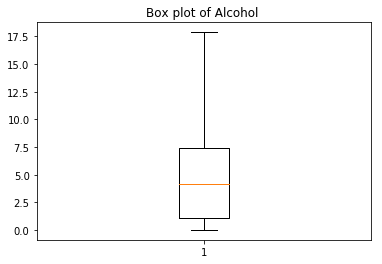

In [72]:
plt.boxplot(life_expectancy_df["Alcohol"], whis= 200)
plt.title("Box plot of Alcohol ")
plt.show()
#Shows  major outliers

Monotonic trnasformation was used for the variables that have outliers because the variables are not normally distributed also. 

In [77]:
life_expectancy_df["log transformed Adult Mortality"] = transformed_life_expectancy = np.log(life_expectancy_df["Adult Mortality"])
life_expectancy_df["log transformed Population"] = transformed_life_expectancy = np.log(life_expectancy_df["Population"])
life_expectancy_df["log transformed GDP"] = transformed_life_expectancy = np.log(life_expectancy_df["GDP"])


In [79]:
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,log transformed Adult Mortality,log transformed Population,log transformed GDP
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2385.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2.938000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,4.709236,14.440606,7.688616
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,25.070016,11467.272489,19.927677,160.445548,...,5.077785,13136.800417,5.381546e+07,4.420195,4.508882,0.210904,3.358920,1.072350,2.561028,1.806059
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,3.526361,0.519597
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,77.000000,0.000000,19.400000,0.000000,...,0.100000,580.486996,4.189172e+05,1.600000,1.500000,0.493000,10.100000,4.304065,12.945428,6.363865
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,92.000000,17.000000,43.000000,4.000000,...,0.100000,3116.561755,3.675929e+06,3.300000,3.300000,0.677000,12.300000,4.969813,15.117310,8.044485
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,97.000000,360.250000,56.100000,28.000000,...,0.800000,7483.158469,1.275338e+07,7.200000,7.200000,0.779000,14.300000,5.424950,16.361307,8.920410
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,6.583409,20.980895,11.688329


In [81]:
life_expectancy_df.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,log transformed Adult Mortality,log transformed Population,log transformed GDP
count,2938,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2385.000000,2938.000000,...,2938.000000,2938.000000,2.938000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2938.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Norway,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,4.709236,14.440606,7.688616
std,NaN,4.613841,NaN,9.507640,124.080302,117.926501,3.916288,1987.914858,25.070016,11467.272489,...,5.077785,13136.800417,5.381546e+07,4.420195,4.508882,0.210904,3.358920,1.072350,2.561028,1.806059
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,3.526361,0.519597
25%,NaN,2004.000000,NaN,63.200000,74.000000,0.000000,1.092500,4.685343,77.000000,0.000000,...,0.100000,580.486996,4.189172e+05,1.600000,1.500000,0.493000,10.100000,4.304065,12.945428,6.363865
50%,NaN,2008.000000,NaN,72.000000,144.000000,3.000000,4.160000,64.912906,92.000000,17.000000,...,0.100000,3116.561755,3.675929e+06,3.300000,3.300000,0.677000,12.300000,4.969813,15.117310,8.044485
75%,NaN,2012.000000,NaN,75.600000,227.000000,22.000000,7.390000,441.534144,97.000000,360.250000,...,0.800000,7483.158469,1.275338e+07,7.200000,7.200000,0.779000,14.300000,5.424950,16.361307,8.920410


The mean of log transformed Adult Mortality is 4.709 and mean of Adult Mortality is 164.796. This is a huge shift to fixed the outliers using log transformation. 

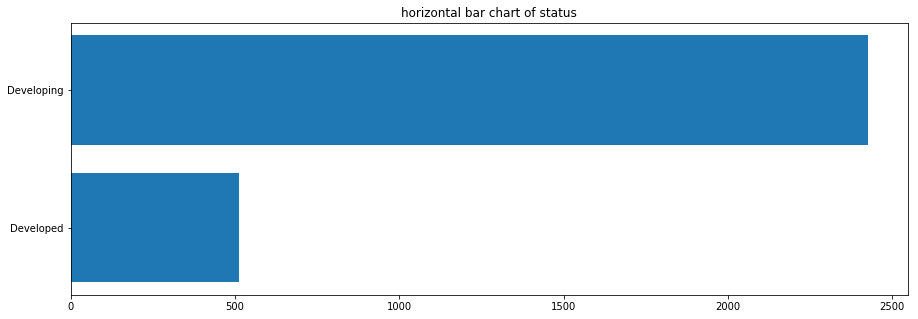

In [88]:
plt.figure(figsize=(15,5))
plt.barh(life_expectancy_df.groupby("Status")["Status"].count().index,
         life_expectancy_df.groupby("Status")["Status"].count())
         
         
plt.title("horizontal bar chart of status")

plt.show()

Univariate techinques focus on the Adult mortality and the status variables.

In [110]:
life_expectancy_corr=life_expectancy_df.corr()
life_expectancy_corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,log transformed Adult Mortality,log transformed Population,log transformed GDP
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.104333,-0.082493,0.108327,-0.042937,...,-0.139741,0.093351,0.014951,-0.047876,-0.050929,0.243468,0.209400,-0.026148,0.043162,0.151079
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.255760,-0.157574,0.559255,-0.222503,...,-0.556457,0.430493,-0.019638,-0.476561,-0.470977,0.724631,0.748263,-0.447629,-0.050819,0.523716
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.161828,0.031174,-0.381449,0.094135,...,0.523727,-0.277053,-0.012501,0.302501,0.308053,-0.457530,-0.452380,0.833857,0.057955,-0.315154
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.223566,0.501128,-0.227220,0.996629,...,0.025231,-0.107109,0.548522,0.465711,0.471350,-0.145139,-0.193720,0.046173,0.185801,-0.156820
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.084784,-0.051055,0.318070,-0.110777,...,-0.048650,0.318591,-0.030765,-0.417874,-0.406784,0.433404,0.517731,-0.150593,-0.010928,0.379222
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.016274,-0.056596,0.228537,-0.087852,...,-0.097857,0.888140,-0.024648,-0.251369,-0.252905,0.381952,0.389687,-0.206615,-0.025112,0.508125
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.084784,0.016274,1.000000,-0.120529,0.149848,-0.233126,...,-0.112675,0.077638,-0.111123,-0.120429,-0.124960,0.199549,0.231117,-0.079666,-0.007621,0.137512
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.120529,1.000000,-0.175925,0.507809,...,0.030899,-0.068060,0.236250,0.224808,0.221072,-0.129568,-0.137225,0.003929,0.075608,-0.091607
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.149848,-0.175925,1.000000,-0.237586,...,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.498195,0.526114,-0.280858,-0.027779,0.390613
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.233126,0.507809,-0.237586,1.000000,...,0.038062,-0.110640,0.535864,0.467789,0.472263,-0.163305,-0.209373,0.054548,0.188503,-0.165774


In [114]:
life_expectancy_column=life_expectancy_corr.iloc[1,:]
life_expectancy_column

Year                               0.169623
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.255760
Measles                           -0.157574
BMI                                0.559255
under-five deaths                 -0.222503
Polio                              0.464531
Total expenditure                  0.216373
Diphtheria                         0.478465
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.476561
thinness 5-9 years                -0.470977
Income composition of resources    0.724631
Schooling                          0.748263
log transformed Adult Mortality   -0.447629
log transformed Population        -0.050819
log transformed GDP             

This is the correlations for life expectancy. 

Text(0.5, 1.0, 'correlation matrix (Life Expectancy)')

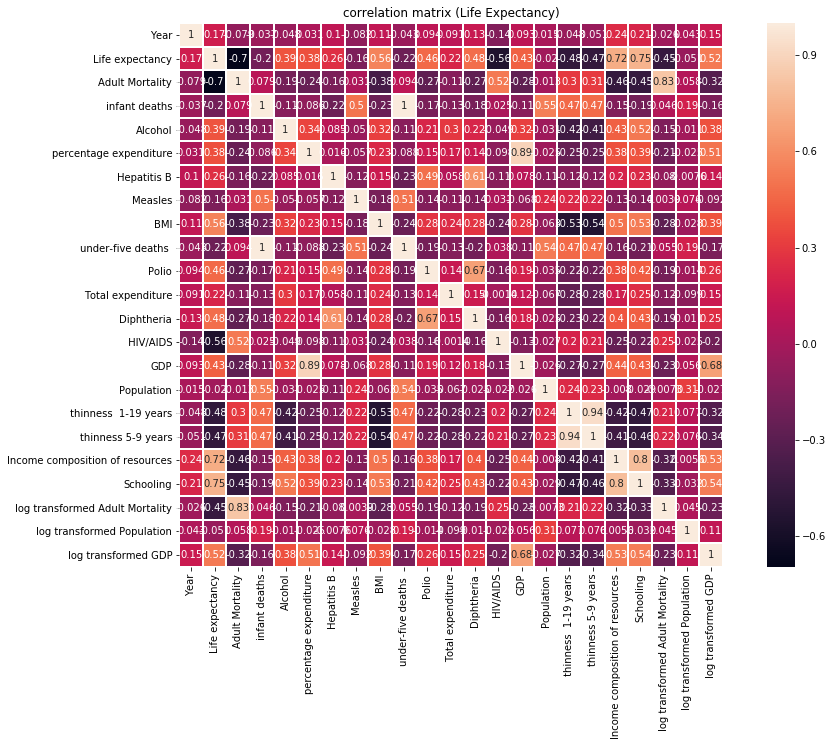

In [120]:
import seaborn as sns

plt.figure(figsize = (16,10))
sns.heatmap(life_expectancy_corr, square=True, annot=True, linewidths=1)
plt.title("correlation matrix (Life Expectancy)")

Based on the heatmap, the majority showed low positive to negative correlations.

In [122]:
life_expectancy_df.groupby("Status").mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,log transformed Adult Mortality,log transformed Population,log transformed GDP
Status,,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.541055,2703.600380,88.041298,499.005859,51.803906,1.810547,...,0.100000,20232.107949,7.940676e+06,1.320703,1.296680,0.852489,15.845474,4.100171,14.218970,9.181627
Developing,2007.522671,67.120177,182.758848,36.384171,3.560670,323.470285,79.763930,2824.926216,35.475772,50.525144,...,2.088664,4792.531044,1.376908e+07,5.592935,5.635242,0.582310,11.219256,4.837777,14.487382,7.373520


Developed status has life expectancy of 79.20 for the mean and Developing status has life expectancy of 67.12 for the mean.

In [124]:
life_expectancy_df = pd.concat([life_expectancy_df, pd.get_dummies(life_expectancy_df["Status"])], axis=1)
life_expectancy_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,log transformed Adult Mortality,log transformed Population,log transformed GDP,Developed,Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010000,71.279624,65.0,1154,...,33736494.0,17.2,17.3,0.479,10.1,5.572154,17.334091,6.370345,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.010000,73.523582,62.0,492,...,327582.0,17.5,17.5,0.476,10.0,5.602119,12.699494,6.417870,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.010000,73.219243,64.0,430,...,31731688.0,17.7,17.7,0.470,9.9,5.590987,17.272826,6.448486,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.010000,78.184215,67.0,2787,...,3696958.0,17.9,18.0,0.463,9.8,5.605802,15.123021,6.507217,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.010000,7.097109,68.0,3013,...,2978599.0,18.2,18.2,0.454,9.5,5.616771,14.906964,4.151626,0,1
5,Afghanistan,2010,Developing,58.8,279.0,74,0.010000,79.679367,66.0,1989,...,2883167.0,18.4,18.4,0.448,9.2,5.631212,14.874400,6.315953,0,1
6,Afghanistan,2009,Developing,58.6,281.0,77,0.010000,56.762217,63.0,2861,...,284331.0,18.6,18.7,0.434,8.9,5.638355,12.557894,6.100080,0,1
7,Afghanistan,2008,Developing,58.1,287.0,80,0.030000,25.873925,64.0,1599,...,2729431.0,18.8,18.9,0.433,8.7,5.659482,14.819604,5.922546,0,1
8,Afghanistan,2007,Developing,57.5,295.0,82,0.020000,10.910156,63.0,1141,...,26616792.0,19.0,19.1,0.415,8.4,5.686975,17.097053,5.913059,0,1
9,Afghanistan,2006,Developing,57.3,295.0,84,0.030000,17.171518,64.0,1990,...,2589345.0,19.2,19.3,0.405,8.1,5.686975,14.766916,5.607873,0,1


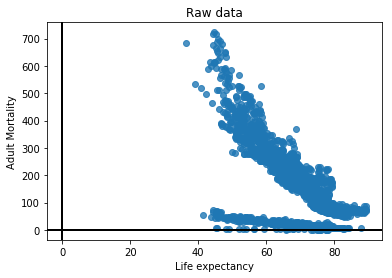

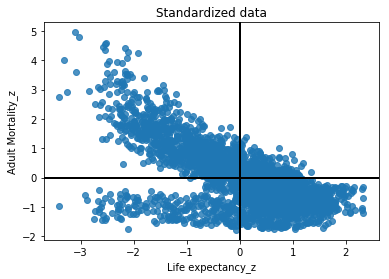

In [128]:
t = sns.regplot(
    'Life expectancy',
    'Adult Mortality',
    life_expectancy_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()


life_expectancy_st_df = pd.DataFrame()
life_expectancy_st_df['Life expectancy_z'] = (life_expectancy_df['Life expectancy'] - life_expectancy_df['Life expectancy'].mean()) / life_expectancy_df['Life expectancy'].std()
life_expectancy_st_df['Adult Mortality_z'] = (life_expectancy_df['Adult Mortality'] - life_expectancy_df['Adult Mortality'].mean()) / life_expectancy_df['Adult Mortality'].std()

t = sns.regplot(
    'Life expectancy_z',
    'Adult Mortality_z',
    life_expectancy_st_df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

The correlation between Life expectancy and Adult Mortality is -0.7. The PCA will bound to have problems. 

Overall, in this founding that developed status would increase the expected life in countries. Developing status would descrease the expected life in countries. Developed status countries have higher mean  of postive variables that increase expected life like GDP and BMI than developing countries. While undeveloping countries have higher mean of negative variables that descrease expected life like Adult Mortalities, diseases, and infant deaths expect for alcohol. 